<a href="https://colab.research.google.com/github/FreshTuna/Test/blob/master/AE_GPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import glob
import numpy as np
import os 
import os.path
import pandas as pd
import matplotlib.pyplot as plt
from shutil import copyfile, move
from pathlib import Path
from PIL import Image

In [ ]:
os.chdir("/content/drive/My Drive/WayPoint/FullData_Image/201605_Image/")

files = glob.glob("*png")


In [ ]:
def get_im(path):
  img = cv2.imread(path, 0)
  resized = cv2.resize(img, (128, 128))
  return resized

In [ ]:
X_train = []
X_test = []

for fl in files:
          img = get_im(fl)
          X_train.append(img)
          print(fl)
          

scatter586.png
scatter587.png
scatter588.png
scatter589.png
scatter590.png
scatter591.png
scatter592.png
scatter593.png
scatter594.png
scatter595.png
scatter596.png
scatter597.png
scatter598.png
scatter599.png
scatter600.png
scatter601.png
scatter602.png
scatter603.png
scatter604.png
scatter605.png
scatter606.png
scatter607.png
scatter608.png
scatter609.png
scatter610.png
scatter611.png
scatter612.png
scatter613.png
scatter614.png
scatter615.png
scatter616.png
scatter617.png
scatter618.png
scatter619.png
scatter620.png
scatter621.png
scatter622.png
scatter623.png
scatter624.png
scatter625.png
scatter626.png
scatter627.png
scatter628.png
scatter629.png
scatter630.png
scatter631.png
scatter632.png
scatter633.png
scatter634.png
scatter635.png
scatter636.png
scatter637.png
scatter638.png
scatter639.png
scatter640.png
scatter641.png
scatter642.png
scatter643.png
scatter644.png
scatter645.png
scatter646.png
scatter647.png
scatter648.png
scatter649.png
scatter650.png
scatter651.png
scatter652

In [ ]:
print(np.array(X_train).shape)
X_train = np.array(X_train)

(480, 128, 128)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
encoding_dim = 4096

input_img = Input(shape=(16384,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(16384, activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded)


In [ ]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy')

In [ ]:

import numpy as np


In [ ]:
X_train = X_train.astype('float32')/255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
print(X_train.shape)


(480, 16384)


In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=20,
                shuffle=True)

Epoch 1/50
24/24 [==============================] - 1s 57ms/step - loss: 0.0903
Epoch 2/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0154
Epoch 3/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0112
Epoch 4/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0108
Epoch 5/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0107
Epoch 6/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0107
Epoch 7/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0107
Epoch 8/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0108
Epoch 9/50
24/24 [==============================] - 1s 55ms/step - loss: 0.0109
Epoch 10/50
24/24 [==============================] - 1s 55ms/step - loss: 0.0107
Epoch 11/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0108
Epoch 12/50
24/24 [==============================] - 1s 54ms/step - loss: 0.0108
Epoch 13/50
24/24 [==================

In [ ]:
X_test =[]
os.chdir("/content/drive/My Drive/WayPoint/FullData_Image/201606_Image/")

files = glob.glob("*png")
i=0
for fl in files :
  if i == 10: 
    break
  img = get_im(fl)
  X_test.append(img)
  i= i+1


In [ ]:
X_test = np.array(X_test)
X_test = X_test.astype('float32')/255.
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [ ]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

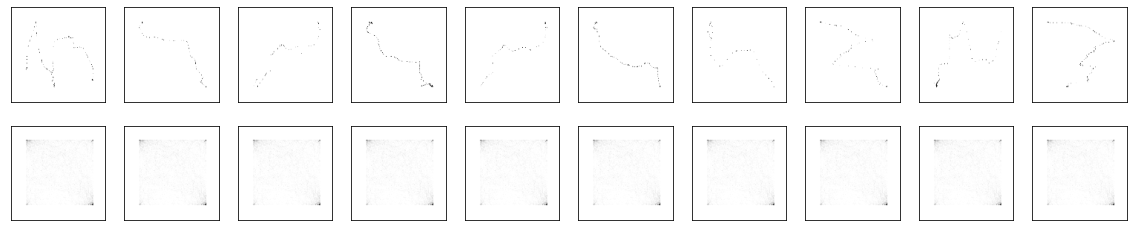

In [ ]:
import matplotlib.pyplot as plt

n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(128 , 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()